The Linear Regression Model attempts to model the relationship between two variables by fitting a linear equation (a line) to observed data. In the model, one variable is considered to be an explanatory variable (X Variable), and the other is considered to be a dependent variable (Y Variable).

we are going to try to model the relationships between two financial assets, the price of a single share of Exxon Mobile stock and the price of a barrel of oil.<br>
 The question we are trying to answer is, does the explanatory variable (Oil) do a good job at predicting the dependent variable (a single share of Exxon Mobile stock.)<br>

explanatory variable (Oil) == (X Variable)
dependent variable (a single share of Exxon Mobile stock == (Y Variable)




In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import math 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

# load the data

In [3]:
#load the data
price_data = pd.read_excel("oil_exxon.xlsx")

#set the date column as the index
price_data.index = pd.to_datetime(price_data['date'])
#drop the old date column
price_data = price_data.drop(['date'], axis=1)


price_data.head()

,exon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


# Clean the Data

In [4]:
#check the data types
price_data.dtypes

exon_price    float64
oil_price     float64
dtype: object

In [5]:
# column name is spelt incorrectly
# lets rename the columm name exon to exxon
new_column_names = {'exon_price':'exxon_price'}
price_data = price_data.rename(columns=new_column_names)
price_data.head()

,exxon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


#### check for missing values

In [6]:
display(price_data.isna().any())

#drop any missing values
price_data = price_data.dropna()
display(price_data.isna().any())

exxon_price    False
oil_price       True
dtype: bool

exxon_price    False
oil_price      False
dtype: bool

# Explore the data
helps us understand some of the following questions:

How is the data distributed?
Does there appear to be a relationship between the two variables?
Are there any outliers?
Is the data skewed?

#### Build a Scatter Plot


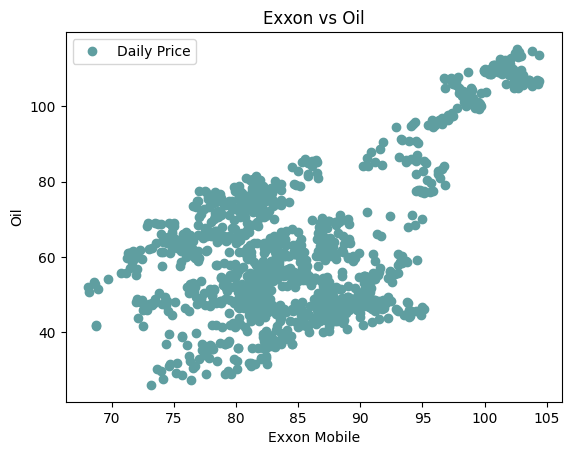

In [7]:
#define the x and y data
x = price_data['exxon_price']
y = price_data['oil_price']
plt.plot(x, y, 'o', color = 'cadetblue', label='Daily Price')
plt.title('Exxon vs Oil')
plt.xlabel('Exxon Mobile')
plt.ylabel('Oil')
plt.legend()

#### Measure the Correlation
Generally speaking, this is how we measure the strength of correlations.

Very strong relationship (|r|>0.8 =>)<br>
Strong relationship (0.6≤|r|)<br>
Moderate relationship (0.4≤|r|)<br>
Weak relationship (0.2≤|r|)<br>
Very weak relationship (|r|)

             exxon_price  oil_price
exxon_price      1.00000    0.60132
oil_price        0.60132    1.00000


<AxesSubplot: >

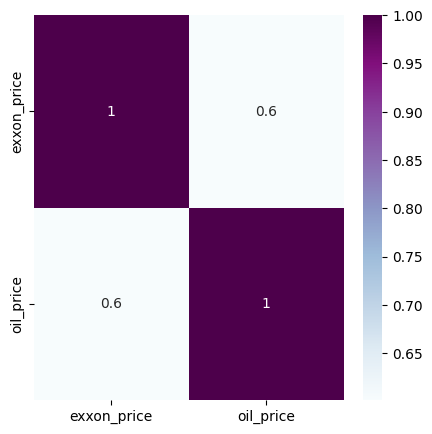

In [14]:
#lets measure the correlation
corr = price_data.corr()
print(corr)
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, cmap='BuPu')


### Create statistical summary

In [15]:
price_data.describe()

,exxon_price,oil_price
count,1248.000000,1248.000000
mean,84.802796,61.935000
std,7.424687,19.288424
min,68.120003,26.010000
25%,80.190002,48.162500
50%,83.024998,57.120000
75%,88.529999,70.725000
max,104.379997,115.190000


### Checking for outliers and Skewness

array([[<AxesSubplot: title={'center': 'exxon_price'}>,
        <AxesSubplot: title={'center': 'oil_price'}>]], dtype=object)

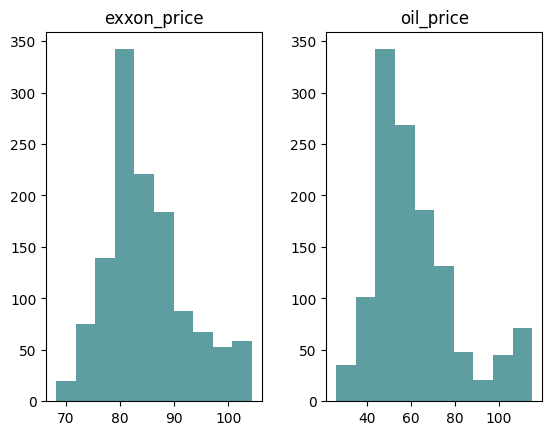

In [18]:
price_data.hist(grid = False, color = 'cadetblue')

However, we probably should verify this by taking some measurements. Two good metrics we can use are the kurtosis and skew, where kurtosis measure the height of our distribution and skew measures whether it is positively or negatively skewed. We will use the scipy.stats module to do the measurements.


Kurtosis

Any distribution with kurtosis ≈3 (excess ≈0) is called mesokurtic. This is a normal distribution
Any distribution with kurtosis <3 (excess kurtosis <0) is called platykurtic. Tails are shorter and thinner, and often its central peak is lower and broader.
Any distribution with kurtosis >3 (excess kurtosis >0) is called leptokurtic. Tails are longer and fatter, and often its central peak is higher and sharper.
Skewness

If skewness is less than −1 or greater than +1, the distribution is highly skewed.
If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
If skewness is between −½ and +½, the distribution is approximately symmetric.

In [22]:
#calculate the excess kurtosis using the fisher method.
#the alternative is pearson which calculates regular kurtosis
#with the fisher method we want our kurtosis to be closer to zero, with the
# pearson method we want our kurtosis to closer to 3
exxon_kurtosis = kurtosis(price_data['exxon_price'], fisher = True)
oil_kurtosis = kurtosis(price_data['oil_price'], fisher = True)

#calculate the skewness
exxon_skew = skew(price_data['exxon_price'])
oil_skew = skew(price_data['oil_price'])

display("Exxon Excess Kurtosis: {:.2}".format(exxon_kurtosis))  # this looks fine
display("Oil Excess Kurtosis: {:.2}".format(oil_kurtosis))      # this looks fine

display("Exxon Skew: {:.2}".format(exxon_skew))          # moderately skewed
display("Oil Skew: {:.2}".format(oil_skew)) 





'Exxon Excess Kurtosis: 0.088'

'Oil Excess Kurtosis: 0.53'

'Exxon Skew: 0.66'

'Oil Skew: 1.0'

##### kurtosistest() and skewtest()

In [23]:
#perform kurtosis test()
display('Exxon')
display(stats.kurtosistest(price_data['exxon_price']))
display('Oil')
display(stats.kurtosistest(price_data['oil_price']))

#skew test
display('Exxon')
display(stats.skewtest(price_data['exxon_price']))
display('Oil')
display(stats.skewtest(price_data['oil_price']))


'Exxon'

KurtosistestResult(statistic=0.7185349375030217, pvalue=0.47242751383320714)

'Oil'

KurtosistestResult(statistic=3.193868719980946, pvalue=0.0014037993965471192)

## Build the Model

### Split the Data

In [24]:
#define our input variable (x) and output variable
Y = price_data.drop('oil_price', axis = 1)
X = price_data[['oil_price']]

## Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1 )

#### Create and fit the Model

In [25]:
#create a Linear Regression model object:
regression_model = LinearRegression()

#pass through the X_train and y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

##### Explore the Output
First, we can check the coefficient of each independent variable in our model. In this case, it is just the oil price. After that let us take a look at the intercept of our regression formula.

In [26]:
#lets get the intercept and coefficient of our model
intercept = regression_model.intercept_[0]
coefficient = regression_model.coef_[0][0]

print("The Coefficient for our model is {:.2}".format(coefficient))
print("The intercept for our model is {:.4}".format(intercept))




The Coefficient for our model is 0.23
The intercept for our model is 70.55


Interpreting the coefficient, we would say that a single unit increase in oil is associated with a 0.23 increase in the price of Exxon Mobile stock. We are NOT CLAIMING CAUSATION, just association.

#### Taking a single prediction


In [27]:
prediction = regression_model.predict([[67.33]])
predicted_value = prediction[0][0]
print("The predicted value is {:.4}".format(predicted_value))


/home/gitonga/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


The predicted value is 86.0


To interpret the output, we would say that given a barrel of oil for 67.33 we would predict Exxon Mobile to be trading for 85.95.

#### Making Multiple Predictions


In [28]:
y_predict = regression_model.predict(X_test)
y_predict[:5]

array([[82.39718427],
       [83.0168246 ],
       [81.66738567],
       [79.18882438],
       [84.12070236]])